In [8]:
import xarray as xr
import pandas as pd
import datetime
import numpy as np
import re
import pdb
import sys
import os

In [9]:
# having a look at the original data

In [10]:
cryo_obs="/media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/CERISE/CRYO_SW"

In [11]:
# Read the data from snow
def get_data_fromtxt(txtFile):
    """
    20221030  6  71.11412  -75.79826  100.00  1
    """
    date = []
    lat     = []
    lon     = []
    snowFrac = []
    f = open(txtFile, 'r')

    for line in f:
        line    = line.strip()
        columns = line.split()
        hour = str(columns[1]).zfill(2)
        date.append(str(columns[0])+hour) #   [str(i)+str(j).zfill(2) for i,j in zip(columns[0],columns[1])]
        lat.append(float(columns[2]))
        lon.append(float(columns[3]))
        snowFrac.append(float(columns[4]))

    f.close()

    return date, lat, lon, snowFrac


In [12]:
snow_file=os.path.join(cryo_obs,"snow_cryo_5-10km_2022100306.dat")
date,lats,lons,snow_prob = get_data_fromtxt(snow_file)

In [13]:
df = pd.DataFrame({"date":date,"lat":lats,"lon":lons,"snow_prob":snow_prob})

<Axes: >

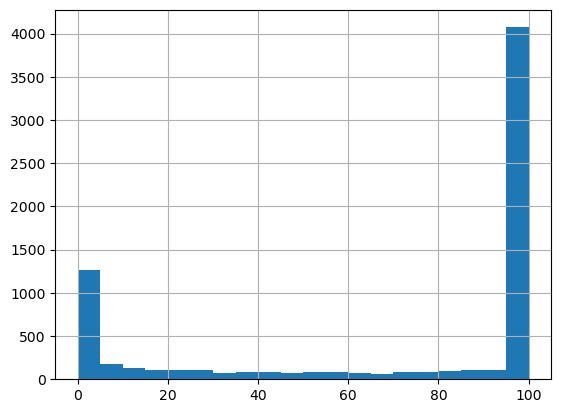

In [14]:
df["snow_prob"].hist(bins=20)

In [15]:
#grib_data="/home/cap/Downloads"
grib_data="/media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/CERISE/MODEL_DATA"
grib_fcst = os.path.join(grib_data,"snow_cover_202210_ll_grid.grib2")
grib_fcst = os.path.join(grib_data,"binary_snow_model_201505_ll_grid_600.grib2")
param_fcst="fscov"
fcst = xr.open_dataset(grib_fcst,engine='cfgrib', backend_kwargs={'filter_by_keys':{'shortName': param_fcst}})
#dtime_obs = obs['time'].values
#print(dtime_obs)


/media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/sources/conda/mambaforge-pypy3/envs/py311/lib/python3.11/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'rasterio' loading failed:
libabsl_cord.so.2301.0.0: cannot open shared object file: No such file or directory
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


(array([355986.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  89464.]),
 array([0.        , 0.05      , 0.1       , 0.15000001, 0.2       ,
        0.25      , 0.30000001, 0.34999999, 0.40000001, 0.44999999,
        0.5       , 0.55000001, 0.60000002, 0.64999998, 0.69999999,
        0.75      , 0.80000001, 0.85000002, 0.89999998, 0.94999999,
        1.        ]),
 <BarContainer object of 20 artists>)

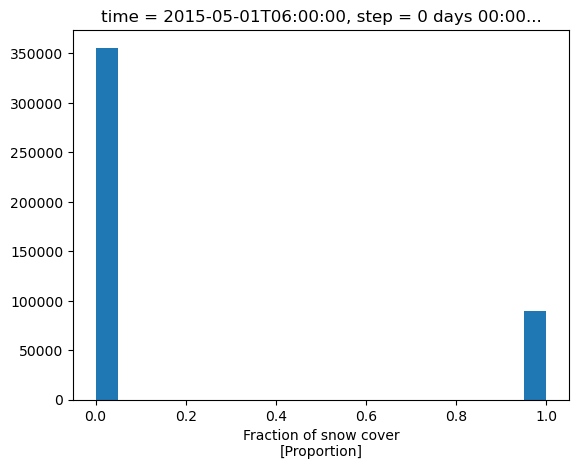

In [16]:
fcst["fscov"][0,:,:].plot.hist(bins=20)

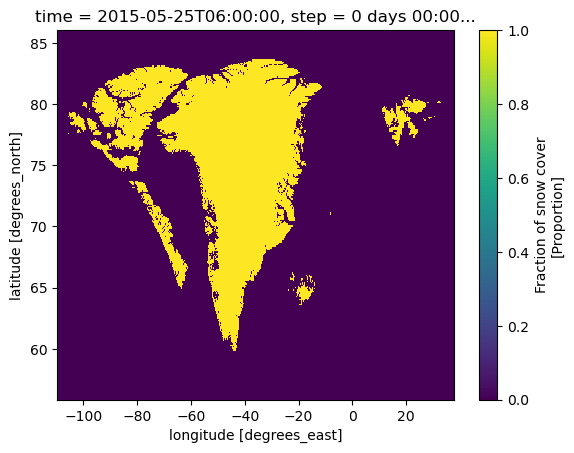

In [17]:
fcst["fscov"][24,:,:].plot()

(array([357345.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  88105.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

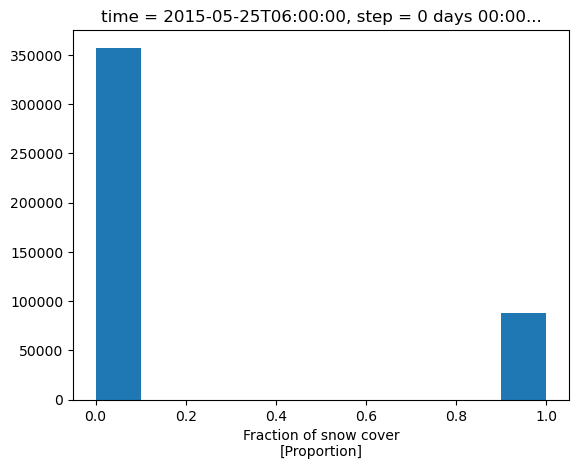

In [18]:
fcst["fscov"][24,:,:].plot.hist()

In [19]:
#mport eccodes as ecc
#file = open(grib_fcst)
#aram_code = 260289
#hile True:
#   msg = ecc.codes_grib_new_from_file(gfile)
#   if msg is None:
#       break
#   key = ecc.codes_get_long(msg,"param")
#   if key == param_code:
#       fcst = ecc.codes_get_values(msg)
#       
#file.close()

In [20]:
obs_nc  = os.path.join(grib_data,"daily-avhrr-sce-nhl_ease-50_201505111200.nc")
obs_ease = xr.open_dataset(obs_nc,engine='netcdf4')

In [21]:
obs_ease["time"]

<xarray.DataArray 'time' (time: 1)>
array(['2015-05-11T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-05-11
Attributes:
    axis:           T
    long_name:      reference time of product
    standard_name:  time
    bounds:         time_bounds

In [22]:
# check the data in the obs file


In [24]:
grib_fcst = os.path.join(grib_data,"snow_cover_202210_ll_grid.grib2")
grib_fcst = os.path.join(grib_data,"binary_snow_model_201505_ll_grid_600.grib2")
param_fcst="fscov"
fcst = xr.open_dataset(grib_fcst,engine='cfgrib', backend_kwargs={'filter_by_keys':{'shortName': param_fcst}})
grib_obs = os.path.join(grib_data,"binary_snow_cryo_201505_ll_grid_600.grib2")
obs = xr.open_dataset(grib_obs,engine='cfgrib', backend_kwargs={'filter_by_keys':{'shortName': param_fcst}})
#dtime_obs = obs['time'].values

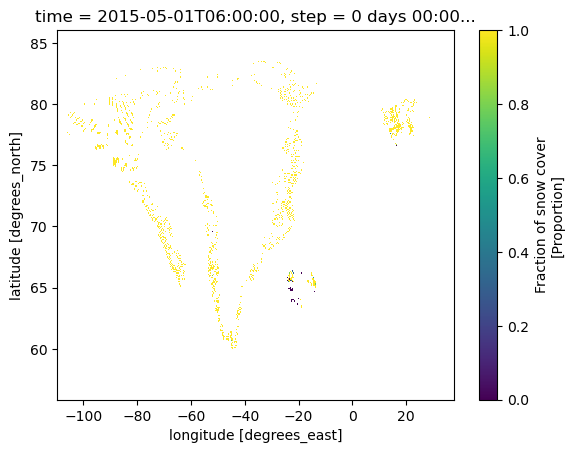

In [36]:
obs["fscov"][0,:,:].plot()

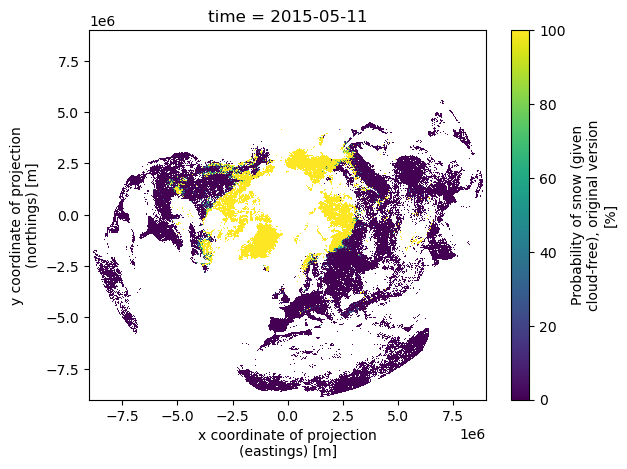

In [41]:
obs_ease["prob_snow_o"][0,:,:].plot()

In [44]:
# plot with the right projection
obs_ease
yc = obs_ease["yc"]
xc = obs_ease["xc"]

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

prob_sat = obs_ease["prob_snow_o"][0,:,:]
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree())
CS = ax.contourf(xc,xc,obs_ease["prob_snow_c"][0,:,:],transform=ccrs.PlateCarree(),cmap="RdBu_r") #,colors=t_colors,levels=t_levels)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.coastlines(color='black')
ax.set_title('Probabilty of snow', fontsize=16)
cbar = plt.colorbar(im,fraction=0.05, pad=0.04,orientation="horizontal")
#    cbar.set_label('Temperature (C)')


In [ ]:
plt.show()